In [1]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [2]:
# In order to connect to the SQLite database, we need to use the create_engine() function.  This
# doesn't actually connect to the database, it just prepares the database file to be connected to
# later on. The primary purpose is to set up the ability to query a SQLite database. It will 
# typically have 1 parameter, the location of the SQLite database file.

# Python SQL toolkit and Object Relational Mapper
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Reflect the existing database into a new model with teh automap_base() function.  Reflecting a 
# database into a new model essentially means to transfer the contents of the database into a 
# different structure of data. Automap Base creates class for an automap scheme in SQLAlchemy. It
# sets up a foundation to build on in SQLAlcheny, by adding it to the code, it will help the rest
# of the code function properly.

# reflect an existing database into a new model
Base = automap_base()

In [4]:
# Now the environment is set up for SQLAlchemy, we can reflect our tables with prepare() function. 
# By adding this code, we'll reflect the scheme of the SQLite tables into the code and create 
# mappings. When we reflect tables, we create classes that help keep the code separate. This 
# ensures the code is separate such that if other classes or systems want to interact with it, 
# they can interact with only specific subsets of data instead of the whole dataset. 

# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# Once we've added the base.prepare() function, we should confirm the Automap was able to find all
# of the data in the SQLite database. Double-check this by using Base.classes.keys(). This code
# references the classes that were mapped in each table. Base.classes gives us access to all the 
# classes. Keys() references all of the names of the classes.

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# In order to reference a specific class, use Base.classes.<class name>. For example, to reference
# the station class, use Base.classes.station. Since it can be rather cumberson to type 
# Base.classes every time we want to reference the measurement or station classes, you can give the
# classes a new variable names. In this case, we'll create a new reference for the measurement
# class and station class.

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Now you ahve the reference saved to a new variable create a session link to the database with 
# code. 1st use a SQLAlchemy Session to query the database. The session essentially allows us to 
# query for the data.

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []

# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
print(results.all())

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [14]:
# Sort the dataframe by date
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()
# print(df)
# df.head()

# To remove the double "date" values, print the Dataframe without the index to see just the date
# and participitation. You will have to use a slightly different print statement. 1st convert 
# the Dataframe to strings, then set the index to False. This will allow the Dataframe to be 
# printed without the index
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

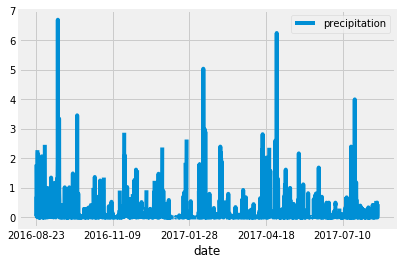

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [22]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [25]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


# Challenge

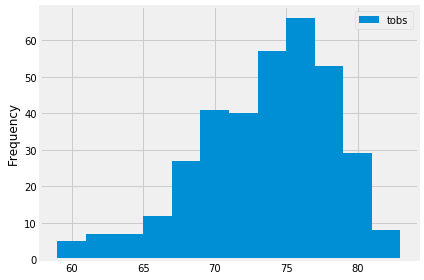

In [26]:
# Create the bins to divide the temperature observations - 12 bins
df.plot.hist(bins=12)

# Compress the x-axis labels so they fit into the box holding the plot.
plt.tight_layout()

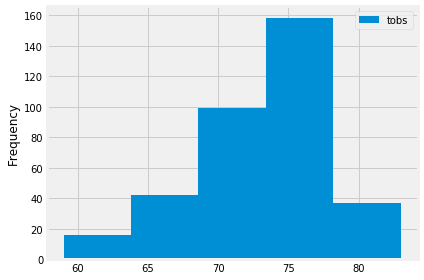

In [27]:
# Create the bins to divide the temperature observations - 5 bins
df.plot.hist(bins=5)

# Compress the x-axis labels so they fit into the box holding the plot.
plt.tight_layout()

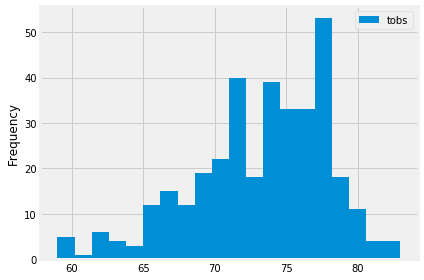

In [28]:
# Create the bins to divide the temperature observations - 20 bins
df.plot.hist(bins=20)

# Compress the x-axis labels so they fit into the box holding the plot.
plt.tight_layout()